# What's the Weather Like?

### Analysis
* ##### Observed trend 1: It is hotter at the equator, and the southern hemisphere is warmer than the northern heisphere currently.

* ##### Observed trend 2: It seemds like no relationship between wind speed, cloudiness and humidity.

* ##### Observed trend 3: The wind speed at cities around latitude 40-60 are significantly higher than others.

In [1]:
# Dependencies
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from citipy import citipy
from random import uniform
from config import owm_key

### Generate Cities List

In [2]:
# Select 500 unique cities
cities_df = pd.DataFrame(columns=("city","country","lat","lng","temp","humidity","cloudiness","wind_speed"))
def getCoordinates(quadrant):
    if quadrant == 1:
        x = uniform(0,90)
        y = uniform(0,-180)
        return x,y
    if quadrant == 2:
        x = uniform(0,90)
        y = uniform(0,180)
        return x,y
    if quadrant == 3:
        x = uniform(0,-90)
        y = uniform(0,180)
        return x,y
    x = uniform(0,-90)
    y = uniform(0,-180)
    return x,y

# Based on quadrant, generate a full range of cities, lng and lat
sample_size_lim = 500
sample_size = len(cities_df)
while sample_size < sample_size_lim:
    quadrant = (sample_size % 4) + 1
    point = (getCoordinates(quadrant))
    city = citipy.nearest_city(point[0], point[1])
    if not ((cities_df['city'] == city.city_name) & (cities_df['country'] == city.country_code)).any():
        #print(f"city: {city.city_name} country: {city.country_code}, coordinates: {point}")
        cities_df.loc[sample_size] = [city.city_name, city.country_code, point[0], point[1],'','','','']
    sample_size = len(cities_df)
cities_df.head(10)

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,bethel,us,64.693749,-157.126569,,,,
1,saskylakh,ru,89.943664,109.855906,,,,
2,east london,za,-41.667103,33.930696,,,,
3,ushuaia,ar,-89.503201,-74.615185,,,,
4,clyde river,ca,68.726787,-83.995841,,,,
5,victoria,sc,0.889960,60.740887,,,,
6,busselton,au,-40.354639,101.578735,,,,
7,ancud,cl,-40.510077,-99.969223,,,,
8,scottsbluff,us,42.370745,-103.220794,,,,
9,airai,pw,6.521737,143.029974,,,,


### Perform API Calls

In [3]:
owm_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

for idx, row in cities_df.iterrows():
    print("Now retrieving weather for city: %s, #%s" % ( idx, row['city']))
    query_url = owm_url + "appid=" + owm_key + "&lat=" + str(row["lat"]) + "&lon=" + str(row["lng"]) + "&units=imperial&mode=json"
    print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        cities_df.set_value(idx,'temp',weather_json["main"]["temp"])
        cities_df.set_value(idx,'humidity',weather_json["main"]["humidity"])
        cities_df.set_value(idx,'cloudiness',weather_json["clouds"]["all"])
        cities_df.set_value(idx,'wind_speed',weather_json["wind"]["speed"])
    except:
        print("skipping city %s" % (row['city']))
cities_df.head(10)

Now retrieving weather for city: 0, #bethel
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=64.693748760086&lon=-157.12656868352445&units=imperial&mode=json


/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Users/sean/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Now retrieving weather for city: 1, #saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=89.94366374206373&lon=109.85590644211882&units=imperial&mode=json
Now retrieving weather for city: 2, #east london
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-41.66710277806457&lon=33.93069632672566&units=imperial&mode=json
Now retrieving weather for city: 3, #ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-89.50320054312527&lon=-74.61518523467501&units=imperial&mode=json
Now retrieving weather for city: 4, #clyde river
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=68.72678744970393&lon=-83.99584133110906&units=imperial&mode=json
Now retrieving weather for city: 5, #victoria
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=0.8899603386896693&lon=60.74088689626413&units=im

Now retrieving weather for city: 42, #bluff
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-74.53386121900743&lon=172.23814019625812&units=imperial&mode=json
Now retrieving weather for city: 43, #alofi
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-21.359327225487995&lon=-169.4750533860224&units=imperial&mode=json
Now retrieving weather for city: 44, #tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=87.4088210227105&lon=-137.70738936339225&units=imperial&mode=json
Now retrieving weather for city: 45, #vostok
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=50.292938152684016&lon=151.53228502459257&units=imperial&mode=json
Now retrieving weather for city: 46, #mananjary
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-21.60601254778377&lon=48.50422970200463&units=impe

Now retrieving weather for city: 83, #alegrete
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-29.797111039505143&lon=-55.73358593707849&units=imperial&mode=json
Now retrieving weather for city: 84, #les cayes
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=16.438966476653814&lon=-74.7538775365225&units=imperial&mode=json
Now retrieving weather for city: 85, #holoby
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=51.01808699615245&lon=24.914498117049316&units=imperial&mode=json
Now retrieving weather for city: 86, #grabouw
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-34.11897832936808&lon=18.99517931243614&units=imperial&mode=json
Now retrieving weather for city: 87, #mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-48.89579152094857&lon=-48.12453236696511&unit

Now retrieving weather for city: 124, #mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=69.4013441789406&lon=-178.95202257136262&units=imperial&mode=json
Now retrieving weather for city: 125, #nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=39.73220654917719&lon=177.27893328488545&units=imperial&mode=json
Now retrieving weather for city: 126, #te anau
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-38.5386722996263&lon=163.74691034115781&units=imperial&mode=json
Now retrieving weather for city: 127, #neuquen
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-40.94764123663149&lon=-69.02323835612123&units=imperial&mode=json
Now retrieving weather for city: 128, #tomatlan
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=18.526798581722154&lon=-108.03492489671461

Now retrieving weather for city: 164, #husavik
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=80.41356782875981&lon=-6.8816751613071165&units=imperial&mode=json
Now retrieving weather for city: 165, #nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=81.12865734035786&lon=139.7743336911021&units=imperial&mode=json
Now retrieving weather for city: 166, #asau
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-12.051079410163716&lon=174.85013805110927&units=imperial&mode=json
Now retrieving weather for city: 167, #viedma
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-46.43965082131289&lon=-58.867118933405365&units=imperial&mode=json
Now retrieving weather for city: 168, #lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=13.273245873663583&lon=-104.61223298586

Now retrieving weather for city: 204, #burica
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=6.073704843138772&lon=-83.79572910853456&units=imperial&mode=json
Now retrieving weather for city: 205, #misratah
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=33.27207701435175&lon=15.393281608849643&units=imperial&mode=json
Now retrieving weather for city: 206, #dunedin
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-52.24089447352323&lon=176.80644304805875&units=imperial&mode=json
Now retrieving weather for city: 207, #barranca
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-4.559080261301966&lon=-76.47934761201583&units=imperial&mode=json
Now retrieving weather for city: 208, #pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=26.395095206160523&lon=-135.6030943129216&

Now retrieving weather for city: 244, #tucuma
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=0.4455291539240558&lon=-49.32196157785421&units=imperial&mode=json
Now retrieving weather for city: 245, #ternate
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=2.58451542679079&lon=129.25906271329956&units=imperial&mode=json
Now retrieving weather for city: 246, #port augusta
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-30.494834948278747&lon=138.93155752648966&units=imperial&mode=json
Now retrieving weather for city: 247, #lampa
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-15.22815300397681&lon=-70.43846464081528&units=imperial&mode=json
Now retrieving weather for city: 248, #botwood
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=48.422631095860396&lon=-55.11852547752663&unit

Now retrieving weather for city: 284, #iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=57.60304404216923&lon=-65.4130357060805&units=imperial&mode=json
Now retrieving weather for city: 285, #kuche
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=39.40545704899044&lon=83.28408719133127&units=imperial&mode=json
Now retrieving weather for city: 286, #nyalikungu
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-3.116797620768713&lon=33.75802132762884&units=imperial&mode=json
Now retrieving weather for city: 287, #humberto de campos
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-2.538001646397908&lon=-43.47265485027948&units=imperial&mode=json
Now retrieving weather for city: 288, #nantucket
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=37.75830040458706&lon=-68.971670813891

Now retrieving weather for city: 324, #mazagao
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=1.0218676312464325&lon=-52.76515607025865&units=imperial&mode=json
Now retrieving weather for city: 325, #kracheh
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=12.184109107432253&lon=106.1347561651546&units=imperial&mode=json
Now retrieving weather for city: 326, #loa janan
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-0.3025970319862692&lon=116.80953697441001&units=imperial&mode=json
Now retrieving weather for city: 327, #pitimbu
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-7.176436268386376&lon=-27.56645515778294&units=imperial&mode=json
Now retrieving weather for city: 328, #warner robins
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=32.64506006279156&lon=-83.5798365494819

Now retrieving weather for city: 364, #nome
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=60.95467715435079&lon=-166.41304128686073&units=imperial&mode=json
Now retrieving weather for city: 365, #pakxan
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=18.16382945859513&lon=103.4381819937403&units=imperial&mode=json
Now retrieving weather for city: 366, #te karaka
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-38.44458889168952&lon=177.99865912902692&units=imperial&mode=json
Now retrieving weather for city: 367, #san ignacio
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-4.767999152249532&lon=-79.07052526531247&units=imperial&mode=json
Now retrieving weather for city: 368, #chapais
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=57.19565241977791&lon=-76.0233408723497&units=i

Now retrieving weather for city: 405, #lugovoy
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=59.92403383737834&lon=65.47514322312853&units=imperial&mode=json
Now retrieving weather for city: 406, #namanga
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-2.544482176689715&lon=37.05878974259349&units=imperial&mode=json
Now retrieving weather for city: 407, #macusani
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-14.210900230984025&lon=-69.74925866466333&units=imperial&mode=json
Now retrieving weather for city: 408, #wilmington
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=32.74369952169199&lon=-76.6684093732357&units=imperial&mode=json
Now retrieving weather for city: 409, #kathmandu
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=28.569313319337027&lon=85.11326365976602&unit

Now retrieving weather for city: 445, #linchuan
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=28.046679203151914&lon=116.16245237222881&units=imperial&mode=json
Now retrieving weather for city: 446, #fomboni
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-13.547672498906692&lon=43.63933181730894&units=imperial&mode=json
Now retrieving weather for city: 447, #alto vera
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-26.421013324228657&lon=-55.755785597161896&units=imperial&mode=json
Now retrieving weather for city: 448, #lagoa
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=51.41898001460586&lon=-32.04906073528213&units=imperial&mode=json
Now retrieving weather for city: 449, #barletta
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=41.62815497141824&lon=16.42427457293725&unit

Now retrieving weather for city: 485, #waddan
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=28.452337693955982&lon=18.519903283427773&units=imperial&mode=json
Now retrieving weather for city: 486, #waitati
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-46.258782562211124&lon=171.5106341881516&units=imperial&mode=json
Now retrieving weather for city: 487, #harper
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=-1.0398999112325247&lon=-8.260589841092845&units=imperial&mode=json
Now retrieving weather for city: 488, #bonavista
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=49.50504892760716&lon=-51.71127706331753&units=imperial&mode=json
Now retrieving weather for city: 489, #solnechnyy
http://api.openweathermap.org/data/2.5/weather?appid=12a2c710a9c0c0df0c085eae1b596d5e&lat=59.0057641253737&lon=139.3576040757858&units

,city,country,lat,lng,temp,humidity,cloudiness,wind_speed
0,bethel,us,64.693749,-157.126569,10.4,72,1,3.49
1,saskylakh,ru,89.943664,109.855906,-5.76,72,36,8.63
2,east london,za,-41.667103,33.930696,56.89,100,92,33.13
3,ushuaia,ar,-89.503201,-74.615185,-52.92,0,32,10.42
4,clyde river,ca,68.726787,-83.995841,-5.4,82,12,12.55
5,victoria,sc,0.889960,60.740887,84.25,100,68,6.51
6,busselton,au,-40.354639,101.578735,57.52,100,24,27.09
7,ancud,cl,-40.510077,-99.969223,56.17,100,0,10.98
8,scottsbluff,us,42.370745,-103.220794,31.05,86,90,13.87
9,airai,pw,6.521737,143.029974,81.91,100,12,10.65


In [4]:
chart_date = datetime.now().strftime('%m/%d/%Y')
chart_date

'04/07/2018'

In [5]:
# Prep work for chart
axis_lat = []
axis_temp = []
axis_humd = []
axis_cloud = []
axis_wind = []

for idx, row in cities_df.iterrows():
    axis_lat.append(float(row["lat"]))
    axis_temp.append(float(row["temp"]))
    axis_humd.append(float(row["humidity"]))
    axis_cloud.append(float(row["cloudiness"]))
    axis_wind.append(float(row["wind_speed"]))

### Latitude vs. Temperature Plot

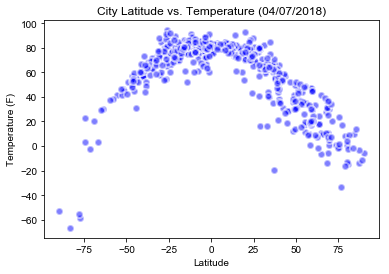

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_temp, marker="o",color="blue",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Temperature (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")
sns.set()
plt.savefig('lat_temp.png')
plt.show()

### Latitude vs. Humidity Plot

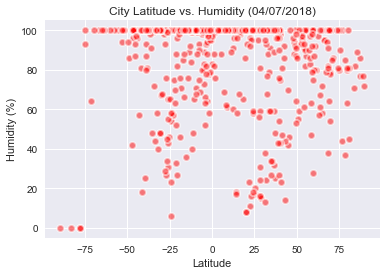

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat,axis_humd, marker="o",color="red",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Humidity (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
sns.set()
plt.savefig('lat_humidity.png')
plt.show()

### Latitude vs. Cloudiness Plot

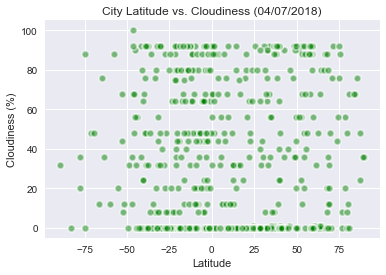

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(axis_lat, axis_cloud, marker="o",color="green",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Cloudiness (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
sns.set()
plt.savefig('lat_cloud.png')
plt.show()

### Latitude vs. Wind Speed Plot

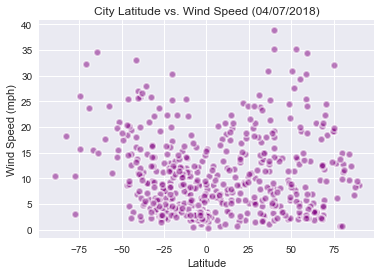

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter( axis_lat,axis_wind,marker="o",color="purple",s=50, linewidths=2,edgecolor='w',alpha=0.5)
ax.set_title("City Latitude vs. Wind Speed (%s)" % (chart_date))
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
sns.set()
plt.savefig('lat_wind.png')
plt.show()

### Output Results

In [10]:
cities_df.to_csv('weather_cities.csv')